In [1]:
import requests

import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

subscription_key = "<SUBSCRIPTION_KEY>"
assert subscription_key

vision_base_url = "https://<LOCATION>.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

image_path = "pos.png"

image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()


analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

{'categories': [{'name': 'others_', 'score': 0.99609375}], 'color': {'dominantColorForeground': 'Black', 'dominantColorBackground': 'Grey', 'dominantColors': ['Grey', 'Black'], 'accentColor': '926C39', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['indoor', 'black', 'sitting', 'phone', 'cellphone', 'table', 'small', 'monitor', 'clock', 'computer', 'screen', 'holding'], 'captions': [{'text': 'screen of a cell phone', 'confidence': 0.8412502665943767}]}, 'requestId': '190e0efa-7c7a-467b-b937-cd0e151c86c7', 'metadata': {'width': 1231, 'height': 1654, 'format': 'Png'}}


(-0.5, 473.5, 1036.5, -0.5)

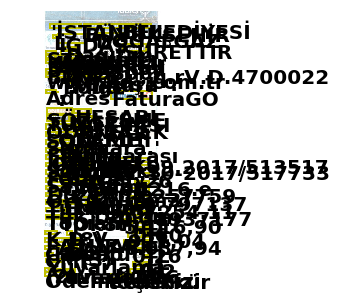

In [2]:
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

subscription_key = "<SUBSCRIPTION_KEY>"
assert subscription_key

vision_base_url = "https://<LOCATION>.api.cognitive.microsoft.com/vision/v2.0/"

ocr_url = vision_base_url + "ocr"

image_url = "https://www.faturago.com/images/igdas_fatura_ornegi.png"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

response

analysis = response.json()

line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

In [2]:
type(word_infos)

list

In [3]:
word_infos

[{'boundingBox': '41,48,119,17', 'text': "'İSTANBUL"},
 {'boundingBox': '171,49,131,17', 'text': 'BÜYÜKŞEHİR'},
 {'boundingBox': '310,50,117,14', 'text': 'BELEDİYESİ'},
 {'boundingBox': '51,91,12,10', 'text': 'L'},
 {'boundingBox': '71,87,105,33', 'text': 'İGDAŞ'},
 {'boundingBox': '98,136,41,12', 'text': 'Dağıtım'},
 {'boundingBox': '26,153,37,12', 'text': 'S•nnyi'},
 {'boundingBox': '83,154,37,9', 'text': 'Ticaret'},
 {'boundingBox': '123,154,21,11', 'text': 'A,Ş,'},
 {'boundingBox': '26,169,34,10', 'text': 'Kazım'},
 {'boundingBox': '64,169,52,10', 'text': 'Karabekir'},
 {'boundingBox': '120,169,43,10', 'text': 'Cd.No:4'},
 {'boundingBox': '26,186,32,10', 'text': '34060'},
 {'boundingBox': '61,187,54,11', 'text': 'Alibeyköy'},
 {'boundingBox': '118,187,3,9', 'text': '/'},
 {'boundingBox': '125,185,43,11', 'text': 'IstBnbul'},
 {'boundingBox': '94,204,18,10', 'text': 'No;'},
 {'boundingBox': '116,204,38,10', 'text': '279806'},
 {'boundingBox': '26,220,140,11', 'text': "BN0k61'„q.rV.D

In [5]:
len(word_infos)

101

In [6]:
type(word_infos[1])

dict

In [7]:
for i in range(len(word_infos)):
   print(word_infos[i]['text'])

text=word_infos[i]['text']


40
/Øné//D
'liading
Company
LLC
(e.e.3)
TAX
INUOICEI
Unit
607,
Level-I,
Hall
of
the
Enirates,
Dubai
+971
4
392
8181
Custoner.....
DEMET
AGREIJJYN
Customer
ID.:
C-134558
Custoner
TRH:
ITEM
1
ITEM
NAME
6769830
Vani
lio
Total
Quantit
Total
before
BAT
VAT
Amount
Total
Anount
with
VAT
Cards
Terninal
120302
Invoice
No.
:
112030200046499
Invoice
Date;
12/28/2019
Invoice
Tine:
12:31
TRH...
100062311400003
Sales
Person:
Harcio
QTY
NIT
PRICE
NET
PRICE
20
CPS
3.20
64.00
20
60.95
3.05
64.00
64.00
Please
refer
to
the
terms
&
conditions
on
the
b4Ck
01
the
invoice
Order
online
at
www.buynesprosso.com
Recyde
your
used
capsules
EXCLUSiVE
NESPRESSO


In [9]:
text_list=[]
for i in range(len(word_infos)):
   text_list.append(word_infos[i]['text'])


my_receipt="".join(str(x) for x in text_list)
my_receipt

"40/Øné//D'liadingCompanyLLC(e.e.3)TAXINUOICEIUnit607,Level-I,HalloftheEnirates,Dubai+97143928181Custoner.....DEMETAGREIJJYNCustomerID.:C-134558CustonerTRH:ITEM1ITEMNAME6769830VanilioTotalQuantitTotalbeforeBATVATAmountTotalAnountwithVATCardsTerninal120302InvoiceNo.:112030200046499InvoiceDate;12/28/2019InvoiceTine:12:31TRH...100062311400003SalesPerson:HarcioQTYNITPRICENETPRICE20CPS3.2064.002060.953.0564.0064.00Pleaserefertotheterms&conditionsontheb4Ck01theinvoiceOrderonlineatwww.buynesprosso.comRecydeyourusedcapsulesEXCLUSiVENESPRESSO"

In [10]:
import re 

date = re.search("(\d+)", my_receipt) 
print(date)

<_sre.SRE_Match object; span=(0, 2), match='40'>


{'status': 'Running'}
{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 0.49, 'width': 474, 'height': 1037, 'unit': 'pixel', 'lines': [{'boundingBox': [49, 47, 431, 49, 430, 65, 48, 64], 'text': 'ISTANBUL BUYUKSEHIR BELEDIYESI', 'words': [{'boundingBox': [62, 49, 161, 49, 161, 64, 62, 63], 'text': 'ISTANBUL'}, {'boundingBox': [171, 49, 298, 49, 298, 65, 171, 64], 'text': 'BUYUKSEHIR'}, {'boundingBox': [310, 49, 431, 50, 430, 65, 310, 65], 'text': 'BELEDIYESI'}]}, {'boundingBox': [68, 86, 175, 85, 176, 118, 69, 119], 'text': 'IGDAS', 'words': [{'boundingBox': [69, 86, 176, 86, 176, 120, 69, 120], 'text': 'IGDAS'}]}, {'boundingBox': [185, 84, 441, 83, 442, 108, 186, 109], 'text': 'DOGALGAZ FATURASI', 'words': [{'boundingBox': [210, 85, 332, 84, 333, 107, 210, 109], 'text': 'DOGALGAZ'}, {'boundingBox': [337, 84, 442, 86, 442, 108, 337, 107], 'text': 'FATURASI'}]}, {'boundingBox': [70, 118, 174, 119, 173, 131, 70, 131], 'text': '"Gakyurlyle Arkadis"', 'word

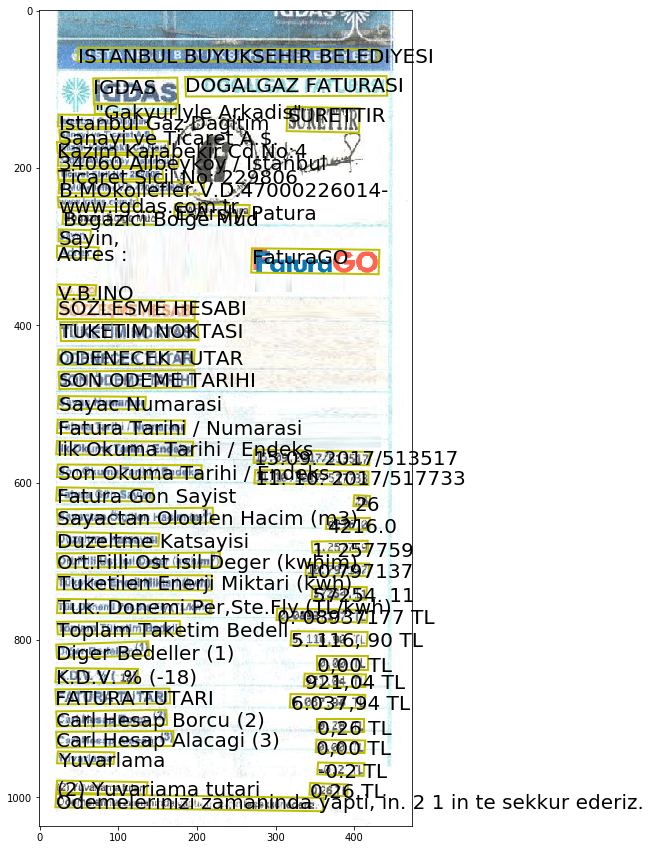

In [2]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO
    
    
subscription_key = "<SUBSCRIPTION_KEY>"
assert subscription_key

endpoint = "https://<LOCATION>.api.cognitive.microsoft.com/"
text_recognition_url = endpoint + "vision/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://www.faturago.com/images/igdas_fatura_ornegi.png"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")

{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 0.01, 'width': 462, 'height': 565, 'unit': 'pixel', 'lines': [{'boundingBox': [3, 2, 222, 5, 221, 69, 3, 67], 'text': 'iletisim', 'words': [{'boundingBox': [5, 3, 209, 6, 211, 69, 3, 68], 'text': 'iletisim'}]}, {'boundingBox': [3, 77, 143, 78, 143, 119, 2, 118], 'text': 'Formu', 'words': [{'boundingBox': [4, 79, 142, 78, 142, 119, 3, 118], 'text': 'Formu'}]}, {'boundingBox': [17, 184, 439, 186, 438, 218, 16, 217], 'text': 'Lutfen asagidaki bilgileri giriniz', 'words': [{'boundingBox': [21, 187, 106, 187, 105, 216, 21, 214], 'text': 'Lutfen'}, {'boundingBox': [111, 187, 239, 187, 238, 218, 110, 216], 'text': 'asagidaki'}, {'boundingBox': [244, 187, 351, 186, 351, 219, 244, 218], 'text': 'bilgileri'}, {'boundingBox': [357, 186, 439, 186, 439, 218, 356, 219], 'text': 'giriniz', 'confidence': 'Low'}]}, {'boundingBox': [18, 243, 39, 243, 38, 256, 17, 256], 'text': 'Ad', 'words': [{'boundingBox': [20, 243, 38,

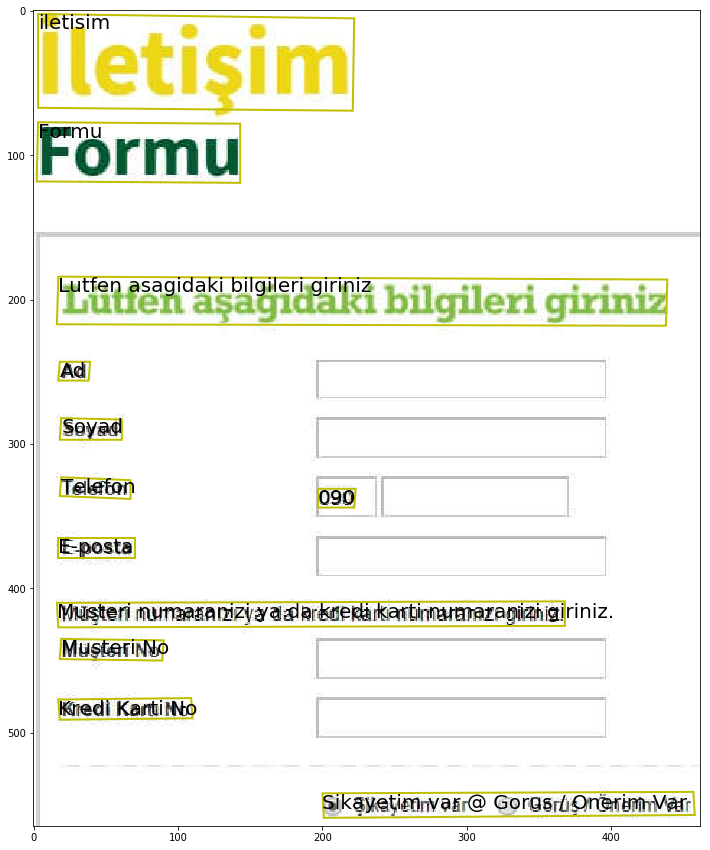

In [3]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
subscription_key = "<SUBSCRIPTION_KEY>"

endpoint = "https://<LOCATION>.api.cognitive.microsoft.com/"

text_recognition_url = endpoint + "vision/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://xn--yatrmhaber-zubb.com/wp-content/uploads/2018/08/garanti-bankasi-iletisim-formu.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")